# Build Model on new DataSet

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
import warnings
warnings.filterwarnings('ignore')

## I. Cleaning and Preprocessing Data

In [2]:
df_songs = pd.read_csv('subset_every_feature.csv')
print(df_songs.shape)
df_songs.head()

(1592, 93)


,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,URL,Date,Region,acousticness,...,timbre_all_3,timbre_all_4,timbre_all_5,timbre_all_6,timbre_all_7,timbre_all_8,timbre_all_9,timbre_all_10,timbre_all_11,timbre_all_12
0,0,27320,103,Me Gusta - Remix,Alkilados,1531,https://open.spotify.com/track/7pueb0FHOYlKAJP...,2017-03-30,gt,0.0671,...,"[9.469, -154.046, -145.614, -107.148, -89.892,...","[-28.48, -63.445, -84.944, -133.198, -69.415, ...","[57.491, 6.579, 15.005, -19.511, -25.059, -18....","[-50.067, -73.619, -60.84, -47.25, -49.875, -4...","[14.833, 15.024, 24.499, -6.516, -8.199, -0.71...","[5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...","[-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...","[0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...","[-10.64, -9.55, -0.761, 12.993, -7.358, -8.305...","[-7.228, -17.296, -22.295, -10.881, -15.234, -..."
1,1,9386,37,Side To Side,Ariana Grande,1184,https://open.spotify.com/track/4pLwZjInHj3SimI...,2017-01-02,lt,0.0408,...,"[9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...","[-28.48, -106.592, 74.184, 57.284, -187.479, -...","[57.491, 32.225, 19.191, 117.453, 49.711, 85.6...","[-50.067, 59.13, 41.981, 134.899, -17.262, -12...","[14.833, -14.27, -23.128, 7.356, -26.231, -40....","[5.359, -5.607, -56.754, -3.356, 47.938, -19.8...","[-27.228, -10.957, -15.955, 30.643, -7.379, -0...","[0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...","[-10.64, 41.326, -93.342, 11.952, 41.559, 5.65...","[-7.228, -12.727, 15.358, -21.875, -2.807, 4.9..."
2,2,66912,64,Bleed It Out,Linkin Park,1256213,https://open.spotify.com/track/3qmvK8QARSPkFTu...,2017-07-21,global,0.0747,...,"[9.469, 63.151, 48.759, 31.726, 60.184, 62.982...","[-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...","[57.491, 52.622, 50.193, 20.511, 28.765, 36.98...","[-50.067, 92.913, -0.076, -37.353, -11.487, -3...","[14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...","[5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...","[-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...","[0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...","[-10.64, -9.127, -21.592, 2.371, -23.49, -20.9...","[-7.228, 10.088, 11.139, -6.284, 5.677, 3.988,..."
3,3,25974,1,Despacito - Remix,Luis Fonsi,504922,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2017-05-26,br,0.2290,...,"[97.607, 61.397, 44.145, 107.329, 99.803, 7.17...","[-310.517, 59.632, 90.762, 50.261, 54.535, 145...","[87.878, 47.105, 78.731, 145.399, 129.718, 106...","[227.047, -39.664, -65.7, -21.95, -18.758, -9....","[68.419, 39.715, 26.9, -7.679, -24.475, -41.45...","[10.427, 10.712, 66.095, -13.804, -8.591, 43.1...","[-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...","[55.849, -11.17, -22.492, 15.199, 15.004, -21....","[-15.943, -6.505, -14.11, -18.788, -11.257, -4...","[7.366, 54.847, 39.465, 44.759, 42.342, 22.446..."
4,4,2535,153,Dubai Shit,Huncho Jack,30015,https://open.spotify.com/track/5TRaIECBIfSkeqk...,2017-12-22,fr,0.0569,...,"[47.989, -5.792, 33.818, 56.002, 82.42, 83.832...","[-56.878, -16.571, -28.488, -11.643, -16.119, ...","[135.306, 87.387, 88.055, 104.627, 100.962, 10...","[-23.107, -51.62, -37.607, -34.948, -42.218, -...","[50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...","[-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...","[-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...","[33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...","[8.548, -11.543, 5.437, -6.115, -7.659, -2.381...","[-45.017, -24.615, -27.227, -23.219, -28.364, ..."


In [3]:
df_songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Position', 'Track Name', 'Artist',
       'Streams', 'URL', 'Date', 'Region', 'acousticness', 'analysis_url',
       'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence', 'ee', 'br',
       'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no',
       'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl',
       'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py',
       'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa',
       'uy', 'au', 'pt', 'fi', 'genre', 'timbre_all_1', 'timbre_all_2',
       'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6',
       'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10',
       'timbre_all_11', 'timbre_all_12'],
      dtype='object')

In [7]:
local_output = ['ee', 'br',
       'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no',
       'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl',
       'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py',
       'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa',
       'uy', 'au', 'pt', 'fi']
df_output = df_songs[local_output]
print('We have outputs in {} countries!'.format(len(local_output)))

We have outputs in 53 countries!


In [154]:
spotify_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo','valence']

TODO: Check correlance between spotify features and popularity

In [9]:
# Create list of URI's for Ricky to scrape features
df_uri = df_songs['uri']
df_uri.head()
df_uri.to_csv('uri.csv')

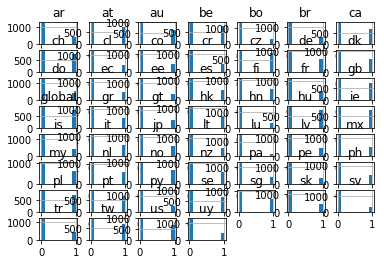

In [10]:
plt.figure()
df_output.hist()
plt.show()

In [11]:
for i in range(df_output.shape[1]):
    print('Country: ' + local_output[i]);
    print(df_output.iloc[:,i].value_counts())

Country: ee
False    1218
True      374
Name: ee, dtype: int64
Country: br
False    1191
True      401
Name: br, dtype: int64
Country: my
False    987
True     605
Name: my, dtype: int64
Country: cz
False    838
True     754
Name: cz, dtype: int64
Country: pe
False    1226
True      366
Name: pe, dtype: int64
Country: gb
False    865
True     727
Name: gb, dtype: int64
Country: ie
False    849
True     743
Name: ie, dtype: int64
Country: se
False    933
True     659
Name: se, dtype: int64
Country: sk
False    1144
True      448
Name: sk, dtype: int64
Country: co
False    1138
True      454
Name: co, dtype: int64
Country: sg
False    989
True     603
Name: sg, dtype: int64
Country: ec
False    1159
True      433
Name: ec, dtype: int64
Country: es
False    1065
True      527
Name: es, dtype: int64
Country: no
False    956
True     636
Name: no, dtype: int64
Country: dk
False    991
True     601
Name: dk, dtype: int64
Country: be
False    859
True     733
Name: be, dtype: int64
Country: l

### Clean Timbre 

In [26]:
timbre_features = ['timbre_all_1', 'timbre_all_2',
       'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6',
       'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10',
       'timbre_all_11', 'timbre_all_12']
df_timbre = df_songs[timbre_features]
df_timbre.head()

,timbre_all_1,timbre_all_2,timbre_all_3,timbre_all_4,timbre_all_5,timbre_all_6,timbre_all_7,timbre_all_8,timbre_all_9,timbre_all_10,timbre_all_11,timbre_all_12
0,"[0.0, 24.1, 23.897, 27.356, 32.848, 33.768, 36...","[171.13, -232.911, -237.644, -157.177, -88.399...","[9.469, -154.046, -145.614, -107.148, -89.892,...","[-28.48, -63.445, -84.944, -133.198, -69.415, ...","[57.491, 6.579, 15.005, -19.511, -25.059, -18....","[-50.067, -73.619, -60.84, -47.25, -49.875, -4...","[14.833, 15.024, 24.499, -6.516, -8.199, -0.71...","[5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...","[-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...","[0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...","[-10.64, -9.55, -0.761, 12.993, -7.358, -8.305...","[-7.228, -17.296, -22.295, -10.881, -15.234, -..."
1,"[0.0, 20.612, 29.468, 37.065, 42.457, 50.682, ...","[171.13, 281.408, 154.885, 7.066, -17.206, 134...","[9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...","[-28.48, -106.592, 74.184, 57.284, -187.479, -...","[57.491, 32.225, 19.191, 117.453, 49.711, 85.6...","[-50.067, 59.13, 41.981, 134.899, -17.262, -12...","[14.833, -14.27, -23.128, 7.356, -26.231, -40....","[5.359, -5.607, -56.754, -3.356, 47.938, -19.8...","[-27.228, -10.957, -15.955, 30.643, -7.379, -0...","[0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...","[-10.64, 41.326, -93.342, 11.952, 41.559, 5.65...","[-7.228, -12.727, 15.358, -21.875, -2.807, 4.9..."
2,"[0.0, 31.777, 39.716, 39.18, 35.536, 35.466, 3...","[171.13, 39.599, 2.798, -27.888, -6.495, 24.74...","[9.469, 63.151, 48.759, 31.726, 60.184, 62.982...","[-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...","[57.491, 52.622, 50.193, 20.511, 28.765, 36.98...","[-50.067, 92.913, -0.076, -37.353, -11.487, -3...","[14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...","[5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...","[-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...","[0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...","[-10.64, -9.127, -21.592, 2.371, -23.49, -20.9...","[-7.228, 10.088, 11.139, -6.284, 5.677, 3.988,..."
3,"[29.786, 44.835, 43.066, 30.901, 26.588, 17.29...","[123.603, 145.221, 165.632, 155.171, 55.16, 54...","[97.607, 61.397, 44.145, 107.329, 99.803, 7.17...","[-310.517, 59.632, 90.762, 50.261, 54.535, 145...","[87.878, 47.105, 78.731, 145.399, 129.718, 106...","[227.047, -39.664, -65.7, -21.95, -18.758, -9....","[68.419, 39.715, 26.9, -7.679, -24.475, -41.45...","[10.427, 10.712, 66.095, -13.804, -8.591, 43.1...","[-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...","[55.849, -11.17, -22.492, 15.199, 15.004, -21....","[-15.943, -6.505, -14.11, -18.788, -11.257, -4...","[7.366, 54.847, 39.465, 44.759, 42.342, 22.446..."
4,"[16.954, 21.548, 23.284, 25.593, 27.256, 28.65...","[-106.498, -157.065, -152.822, -170.706, -169....","[47.989, -5.792, 33.818, 56.002, 82.42, 83.832...","[-56.878, -16.571, -28.488, -11.643, -16.119, ...","[135.306, 87.387, 88.055, 104.627, 100.962, 10...","[-23.107, -51.62, -37.607, -34.948, -42.218, -...","[50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...","[-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...","[-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...","[33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...","[8.548, -11.543, 5.437, -6.115, -7.659, -2.381...","[-45.017, -24.615, -27.227, -23.219, -28.364, ..."


In [27]:
# Check type of array:
type(df_timbre.iloc[0,0])

str

In [28]:
# Function for converting TimbreString into List
def timbreStringToList(timbreString):
    timbreString = timbreString[:-1]
    timbreString = timbreString[1:]
    timbreList = [float(s) for s in timbreString.split(',')]
    return timbreList

In [29]:
# Convert strings to lists
for i in range(df_timbre.shape[1]):
    timbre_df = df_timbre.iloc[:,i]
    for j in range(timbre_df.shape[0]):
        timbre_df[j] = timbreStringToList(timbre_df[j])
    df_timbre.iloc[:,i] = timbre_df

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [30]:
# Test if it's a list
type(df_timbre.iloc[2,1])

list

In [31]:
df_timbre.shape

(1592, 12)

In [32]:
from scipy.stats import kurtosis
from scipy.stats import skew
def f_mean(row):
    return(np.mean(row))
def f_median(row):
    return(np.median(row))
def f_std(row):
     return(np.std(row))
def f_min(row):
     return(np.min(row))
def f_max(row):
     return(np.max(row))
def f_80Percentile(row):
    return(np.percentile(row, 80))
def f_kurtosis(row):
    return(kurtosis(row))
def f_skew(row):
    return(skew(row))

In [33]:
# Create timbre features
for i in range(df_timbre.shape[1]):
    current_column  = df_timbre.iloc[:,i]
    df_timbre['mean_timbre{}'.format(i+1)] = current_column.apply(f_mean)
    df_timbre['median_timbre{}'.format(i+1)] = current_column.apply(f_median)
    df_timbre['std_timbre{}'.format(i+1)] = current_column.apply(f_std)
    df_timbre['min_timbre{}'.format(i+1)] = current_column.apply(f_min)
    df_timbre['max_timbre{}'.format(i+1)] = current_column.apply(f_max)
    df_timbre['range_timbre{}'.format(i+1)] = df_timbre['max_timbre{}'.format(i+1)]-df_timbre['min_timbre{}'.format(i+1)]
    df_timbre['80Percentile_timbre{}'.format(i+1)] = current_column.apply(f_80Percentile)
    df_timbre['kurtosis_timbre{}'.format(i+1)] = current_column.apply(f_kurtosis)
    df_timbre['skewness_timbre{}'.format(i+1)] = current_column.apply(f_skew)

    print('Finished Column {}'.format(i))

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Finished Column 0
Finished Column 1
Finished Column 2
Finished Column 3
Finished Column 4
Finished Column 5
Finished Column 6
Finished Column 7
Finished Column 8
Finished Column 9
Finished Column 10
Finished Column 11


In [34]:
df_timbre.head()

,timbre_all_1,timbre_all_2,timbre_all_3,timbre_all_4,timbre_all_5,timbre_all_6,timbre_all_7,timbre_all_8,timbre_all_9,timbre_all_10,...,skewness_timbre11,mean_timbre12,median_timbre12,std_timbre12,min_timbre12,max_timbre12,range_timbre12,80Percentile_timbre12,kurtosis_timbre12,skewness_timbre12
0,"[0.0, 24.1, 23.897, 27.356, 32.848, 33.768, 36...","[171.13, -232.911, -237.644, -157.177, -88.399...","[9.469, -154.046, -145.614, -107.148, -89.892,...","[-28.48, -63.445, -84.944, -133.198, -69.415, ...","[57.491, 6.579, 15.005, -19.511, -25.059, -18....","[-50.067, -73.619, -60.84, -47.25, -49.875, -4...","[14.833, 15.024, 24.499, -6.516, -8.199, -0.71...","[5.359, 4.801, 18.949, 21.249, -0.277, -0.328,...","[-27.228, -7.805, -8.304, 40.258, 33.085, 33.6...","[0.973, 2.661, -1.462, 14.984, 18.834, 23.424,...",...,-0.277840,-1.537776,-1.051,13.930129,-50.776,63.574,114.350,9.3652,1.205497,0.039955
1,"[0.0, 20.612, 29.468, 37.065, 42.457, 50.682, ...","[171.13, 281.408, 154.885, 7.066, -17.206, 134...","[9.469, 112.323, 9.7, 65.887, 41.122, 85.356, ...","[-28.48, -106.592, 74.184, 57.284, -187.479, -...","[57.491, 32.225, 19.191, 117.453, 49.711, 85.6...","[-50.067, 59.13, 41.981, 134.899, -17.262, -12...","[14.833, -14.27, -23.128, 7.356, -26.231, -40....","[5.359, -5.607, -56.754, -3.356, 47.938, -19.8...","[-27.228, -10.957, -15.955, 30.643, -7.379, -0...","[0.973, 22.207, 15.478, 23.2, -2.171, -21.529,...",...,-0.463507,-0.825864,-1.301,16.670612,-62.822,53.347,116.169,12.5572,0.495832,0.190272
2,"[0.0, 31.777, 39.716, 39.18, 35.536, 35.466, 3...","[171.13, 39.599, 2.798, -27.888, -6.495, 24.74...","[9.469, 63.151, 48.759, 31.726, 60.184, 62.982...","[-28.48, -88.716, 0.539, 34.455, -22.788, 9.36...","[57.491, 52.622, 50.193, 20.511, 28.765, 36.98...","[-50.067, 92.913, -0.076, -37.353, -11.487, -3...","[14.833, 9.734, 6.371, 1.575, 24.376, 29.255, ...","[5.359, 9.137, -7.323, 27.296, -0.841, 43.187,...","[-27.228, 10.681, 3.93, 15.943, 13.14, 5.89, -...","[0.973, -27.245, 10.954, 2.236, -1.93, -2.151,...",...,-0.688450,-6.601244,-7.249,11.947572,-50.644,31.934,82.578,2.8300,0.790660,0.105450
3,"[29.786, 44.835, 43.066, 30.901, 26.588, 17.29...","[123.603, 145.221, 165.632, 155.171, 55.16, 54...","[97.607, 61.397, 44.145, 107.329, 99.803, 7.17...","[-310.517, 59.632, 90.762, 50.261, 54.535, 145...","[87.878, 47.105, 78.731, 145.399, 129.718, 106...","[227.047, -39.664, -65.7, -21.95, -18.758, -9....","[68.419, 39.715, 26.9, -7.679, -24.475, -41.45...","[10.427, 10.712, 66.095, -13.804, -8.591, 43.1...","[-29.121, -18.868, -0.496, -8.432, 0.868, -4.9...","[55.849, -11.17, -22.492, 15.199, 15.004, -21....",...,-0.105637,-3.162504,-2.086,18.089500,-53.538,64.291,117.829,11.4380,0.089782,-0.018116
4,"[16.954, 21.548, 23.284, 25.593, 27.256, 28.65...","[-106.498, -157.065, -152.822, -170.706, -169....","[47.989, -5.792, 33.818, 56.002, 82.42, 83.832...","[-56.878, -16.571, -28.488, -11.643, -16.119, ...","[135.306, 87.387, 88.055, 104.627, 100.962, 10...","[-23.107, -51.62, -37.607, -34.948, -42.218, -...","[50.826, 16.039, 26.418, 5.967, 20.658, 9.299,...","[-10.056, 19.528, 15.119, -1.994, 2.54, 17.328...","[-10.385, 8.696, 12.326, 11.872, 13.119, 16.88...","[33.954, 6.811, 20.58, 11.461, 7.841, 24.766, ...",...,-0.561042,-10.421886,-10.517,17.747941,-58.854,40.107,98.961,4.5160,-0.140665,0.067427


In [37]:
print(list(df_timbre.columns))

['timbre_all_1', 'timbre_all_2', 'timbre_all_3', 'timbre_all_4', 'timbre_all_5', 'timbre_all_6', 'timbre_all_7', 'timbre_all_8', 'timbre_all_9', 'timbre_all_10', 'timbre_all_11', 'timbre_all_12', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mea

In [41]:
# timbre features without vector values in the beginning
timbre_features = list(df_timbre.columns[12:])
print(timbre_features)

['mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', 'median_timbre6', 'std_timbre6', 'min_timbre6', 'max_timbre6', 'range_timbre6', '80Percentile_timbre6', 'kurtosis_timbre6', 'skewness_timbre6', 'mean_timbre7', 'median_timbre7', 'std_

### load popularity 

In [45]:
df_popularity = pd.read_csv('uri_with_popularity_subset.csv')
df_popularity = df_popularity['popularity']
df_popularity.head()

0    61
1    80
2    26
3    84
4    70
Name: popularity, dtype: int64

### Save CSV file of whole dataset:

In [51]:
df = pd.concat([df_songs['uri'], df_songs[spotify_features], df_timbre[timbre_features], df_songs[local_output], df_popularity], axis = 1)
print(df.shape)
df.head()

(1592, 175)


,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,nl,bo,lv,gr,pa,uy,au,pt,fi,popularity
0,spotify:track:7pueb0FHOYlKAJPXhVhwml,0.0671,0.789,221920.0,0.808,0.000115,1.0,0.1710,-4.694,0.0,...,False,False,False,False,False,True,False,False,False,61
1,spotify:track:4pLwZjInHj3SimIyN9SnOz,0.0408,0.648,226160.0,0.738,0.000000,6.0,0.2920,-5.883,0.0,...,True,True,False,True,True,True,True,True,True,80
2,spotify:track:3qmvK8QARSPkFTuKeIXSbs,0.0747,0.542,164760.0,0.932,0.000000,4.0,0.6130,-4.896,1.0,...,True,True,True,True,True,False,True,True,True,26
3,spotify:track:5CtI0qwDJkDQGwXD1H1cLb,0.2290,0.694,228827.0,0.815,0.000000,2.0,0.0924,-4.328,1.0,...,True,True,True,True,True,True,True,True,True,84
4,spotify:track:5TRaIECBIfSkeqkKoG6psm,0.0569,0.768,228431.0,0.535,0.000000,10.0,0.0902,-4.489,0.0,...,False,False,False,True,False,False,False,True,False,70


In [53]:
df.to_csv('cleanedDataSet_final.csv')

## Explore Data

Reload datafile, no need to clean the data again

In [55]:
df = pd.read_csv('cleanedDataSet_final.csv')
columns = list(df.columns)
print(columns)
print(df.shape)

['Unnamed: 0', 'uri', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', 'median_tim

In [165]:
# Extract Features
index = columns.index('skewness_timbre12')
df_features = df.iloc[:,2:index+1]
features = list(df_features.columns)
print('We have {} features extracted'.format(df_features.shape[1]))
print(features)

We have 120 features extracted
['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'mean_timbre1', 'median_timbre1', 'std_timbre1', 'min_timbre1', 'max_timbre1', 'range_timbre1', '80Percentile_timbre1', 'kurtosis_timbre1', 'skewness_timbre1', 'mean_timbre2', 'median_timbre2', 'std_timbre2', 'min_timbre2', 'max_timbre2', 'range_timbre2', '80Percentile_timbre2', 'kurtosis_timbre2', 'skewness_timbre2', 'mean_timbre3', 'median_timbre3', 'std_timbre3', 'min_timbre3', 'max_timbre3', 'range_timbre3', '80Percentile_timbre3', 'kurtosis_timbre3', 'skewness_timbre3', 'mean_timbre4', 'median_timbre4', 'std_timbre4', 'min_timbre4', 'max_timbre4', 'range_timbre4', '80Percentile_timbre4', 'kurtosis_timbre4', 'skewness_timbre4', 'mean_timbre5', 'median_timbre5', 'std_timbre5', 'min_timbre5', 'max_timbre5', 'range_timbre5', '80Percentile_timbre5', 'kurtosis_timbre5', 'skewness_timbre5', 'mean_timbre6', '

In [166]:
# Extract output
df_output = df.iloc[:, index+1:]
output = list(df_output.columns)
print('We have rankings for {} countries, plus the overall popularity:'.format(df_output.shape[1]-1))
print(output)

We have rankings for 53 countries, plus the overall popularity:
['ee', 'br', 'my', 'cz', 'pe', 'gb', 'ie', 'se', 'sk', 'co', 'sg', 'ec', 'es', 'no', 'dk', 'be', 'lu', 'do', 'nz', 'de', 'hu', 'cr', 'jp', 'hk', 'lt', 'pl', 'it', 'hn', 'mx', 'ph', 'cl', 'is', 'ca', 'ar', 'at', 'ch', 'tr', 'py', 'tw', 'gt', 'sv', 'us', 'fr', 'global', 'nl', 'bo', 'lv', 'gr', 'pa', 'uy', 'au', 'pt', 'fi', 'popularity']


### Define a few helper functions for ML

In [64]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import operator

from sklearn.preprocessing import normalize


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [113]:
# Confusion Matrix
def printConfusionMatrix (y_true, y_pred):
    cf=pd.DataFrame(confusion_matrix(y_true, y_pred))
    print(cf)

# Plot ROC Curve
def plotROCCurve (y_true, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+ name)
    plt.legend(loc="lower right")
    plt.show()

In [144]:
# Feature importance
def featureImportance(x_train, y_train, features):
    random_forest = RandomForestClassifier(n_estimators=190)
    random_forest.fit(x_train, y_train)
    values = random_forest.feature_importances_
    dict_featureImportance = dict(zip(features,values))
    sorted_dict = sorted(dict_featureImportance.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_dict

In [200]:
# trains a specific model and report accuracies
def runsModel(x_train, x_test, y_train, y_test, model, printing = True):

    # Train model
    model.fit(x_train, y_train)
    trainingAccuracy = (model.score(x_train, y_train))
    testAccuracy = (model.score(x_test, y_test))

    fpr, tpr, thresholds = roc_curve(y_test, model.predict(x_test))
    roc_auc = auc(fpr, tpr)
    aucScore = (roc_auc)
    
    if (printing):
        print('Test Accuracy: {}'.format(testAccuracy))
        print('Training Accuracy: {}'.format(trainingAccuracy))
        print('AUC Score: {}'.format(aucScore))
        print('Confusion Matrix')
        printConfusionMatrix(y_test, model.predict(x_test))
    return model

In [93]:
# Trains differnt models and compares the results
def performsMLModelComparison(x_train, x_test, y_train, y_test, printing=True, verbose = True):
    '''Tries standard ML models, reports average accuracy and best model (with its accuracy and confusion matrix)'''
    MLModels = [LogisticRegression(), SVC(), Perceptron(), KNeighborsClassifier(n_neighbors = 3), xgb.XGBClassifier(n_estimators = 140), RandomForestClassifier(n_estimators = 140)]
    MLModelsStrings = ["Logistic Regression", "Support Vector Machine", "Perceptron", "KN Neighbors", "Gradient Boosting", "Random Forest"]
    nModels = len(MLModels)
    trainingAccuracy = list()
    testAccuracy = list()
    aucScore = list()

    # Train models
    for i in range(nModels):
        MLModels[i].fit(x_train, y_train)
        trainingAccuracy.append (MLModels[i].score(x_train, y_train))
        testAccuracy.append(MLModels[i].score(x_test, y_test))
        
        fpr, tpr, thresholds = roc_curve(y_test, MLModels[i].predict(x_test))
        roc_auc = auc(fpr, tpr)
        aucScore.append(roc_auc)
    
    # Report average test accuracy
    if (printing and verbose):
        print('Used the following models:')
        print(MLModelsStrings)
        print('Test Scores')
        print(testAccuracy)
        print('AUC Scores')
        print(aucScore)
        print('Average test accuracies of all models is: {}'.format(np.mean(testAccuracy)))
    
    # Find best model
    max_testAccuracy = max(testAccuracy)
    max_index = testAccuracy.index(max_testAccuracy)
    bestModel = MLModels[max_index]
    if (printing):
        print('{} is the best model'.format(MLModelsStrings[max_index]))
        print('Test Accuracy: {}'.format(max_testAccuracy))
        print('AUC Score: {}'.format(aucScore[max_index]))
        print('Confusion Matrix')
        printConfusionMatrix(y_test, bestModel.predict(x_test))
    
    return bestModel

## Predict overall popularity

### Approch 1: without gap

In [168]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592,)


In [169]:
# Create quantile bins for popularity
Y = pd.qcut(Y, 2, labels= False)
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: popularity, dtype: int64

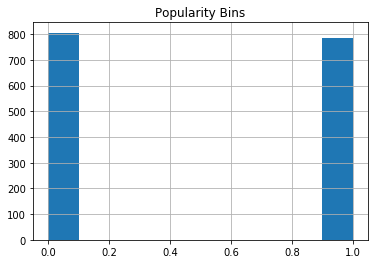

In [170]:
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [171]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 1353
Test Set: 239


In [172]:
performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `ar

Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.5062761506276151, 0.5062761506276151, 0.49372384937238495, 0.5104602510460251, 0.5899581589958159, 0.5857740585774058]
AUC Scores
[0.5, 0.5, 0.5, 0.5113811458187422, 0.5899985992435915, 0.5858663678386329]
Average test accuracies of all models is: 0.5320781032078103
Gradient Boosting is the best model
Test Accuracy: 0.5899581589958159
AUC Score: 0.5899985992435915
Confusion Matrix
    0   1
0  71  50
1  48  70


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=140, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

### Approach 2: with Gap

In [103]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592,)


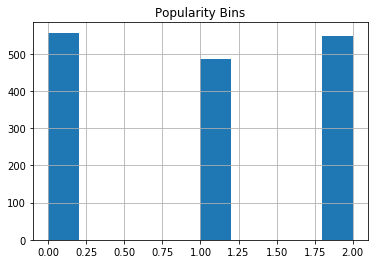

In [104]:
# Create quantile bins for popularity
gapSize = 0.3
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
Y.head()
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [105]:
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

Reduced data set to 1106 from 1592:


In [106]:
# Build input/output:
X = df_curr.iloc[:, :-1]
X_norm = normalize(X)
Y = df_curr.popularity
print('Size of Input: {}'.format(X_norm.shape))
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1106, 120)
Size of Output: (1106,)


In [107]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 940
Test Set: 166


In [109]:
# Trains different models and compare results
model = performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `ar

Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.5180722891566265, 0.5180722891566265, 0.5180722891566265, 0.5301204819277109, 0.608433734939759, 0.5602409638554217]
AUC Scores
[0.5, 0.5, 0.5, 0.5334302325581396, 0.608139534883721, 0.5607558139534884]
Average test accuracies of all models is: 0.5421686746987951
Gradient Boosting is the best model
Test Accuracy: 0.608433734939759
AUC Score: 0.608139534883721
Confusion Matrix
    0   1
0  53  33
1  32  48


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


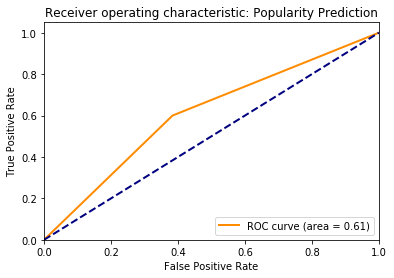

In [114]:
plotROCCurve(y_test, model.predict(x_test), 'Popularity Prediction')

In [145]:
# Analyse feature importance
list_features = featureImportance(x_train, y_train, list(df_features.columns))
dict_features = dict(list_features)

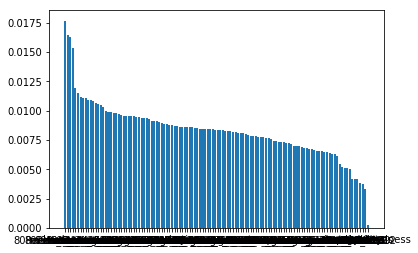

In [146]:
# Plot bar plot of feature importance
plt.figure()
plt.bar(range(len(dict_features)), dict_features.values(), align='center')
plt.xticks(range(len(dict_features)), dict_features.keys())
plt.show()

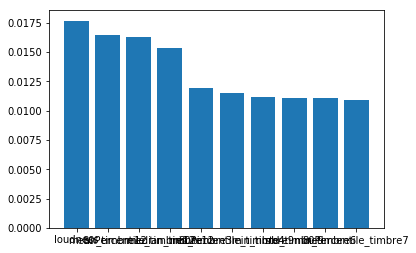

Top 10 Features: 
[('loudness', 0.017676504229459877), ('mean_timbre12', 0.01645216497611007), ('80Percentile_timbre12', 0.01633012211883209), ('median_timbre12', 0.015384552919071755), ('min_timbre3', 0.01195863428853916), ('80Percentile_timbre4', 0.011553122261733226), ('min_timbre9', 0.011166959839625075), ('std_timbre9', 0.011121493326785392), ('min_timbre6', 0.011095442969468329), ('80Percentile_timbre7', 0.01094785160080328)]


In [152]:
dict_topFeatures = dict(list_features[:10])
plt.figure()
plt.bar(range(len(dict_topFeatures)), dict_topFeatures.values(), align='center')
plt.xticks(range(len(dict_topFeatures)), dict_topFeatures.keys())
plt.show()
print('Top 10 Features: ')
print(list_features[:10])

### Approach 3: Group by Genres

In [155]:
df_songs = pd.read_csv('subset_every_feature.csv')
df_genre = df_songs['genre']
df_genre.head()

0                latin
1            dance pop
2    alternative metal
3                latin
4                  pop
Name: genre, dtype: object

In [156]:
df_genre.value_counts()

dance pop                  291
None                       140
pop                        109
latin                       69
hip hop                     37
alternative metal           37
big room                    32
adult standards             31
reggaeton                   28
indie r&b                   24
german hip hop              24
canadian hip hop            23
detroit hip hop             23
french hip hop              22
edm                         22
canadian pop                22
deep dutch hip hop          20
album rock                  19
mandopop                    18
finnish dance pop           16
modern rock                 15
permanent wave              15
neo mellow                  13
deep german hip hop         12
c-pop                       12
danish hip hop              12
tropical house              11
downtempo                   11
deep tropical house         11
francoton                   11
                          ... 
pop rock                     1
movie tu

In [185]:
df_curr = pd.concat([df, df_genre], axis = 1)
df_curr = pd.concat([df_curr[df_curr.genre == 'dance pop'], df_curr[df_curr.genre == 'pop']])
print(df_curr.shape)

(400, 177)


In [186]:
# Define In- and Output
X = df_curr[features]
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_curr['popularity']
print('Size of Output: {}'.format(Y.shape))

Size of Input: (400, 120)
Size of Output: (400,)


In [187]:
# Create quantile bins for popularity
Y = pd.qcut(Y, 2, labels= False)
Y.head()

1     1
8     0
10    1
15    1
25    1
Name: popularity, dtype: int64

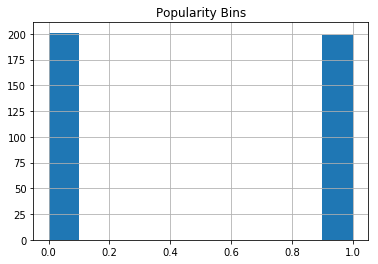

In [188]:
plt.figure()
Y.hist()
plt.title('Popularity Bins')
plt.show()

In [189]:
# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
print('Training Set: {}'.format(x_train.shape[0]))
print('Test Set: {}'.format(x_test.shape[0]))

Training Set: 340
Test Set: 60


In [190]:
model = performsMLModelComparison(x_train, x_test, y_train, y_test)

C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mx190\Anaconda3\envs\data-x\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `ar

Used the following models:
['Logistic Regression', 'Support Vector Machine', 'Perceptron', 'KN Neighbors', 'Gradient Boosting', 'Random Forest']
Test Scores
[0.45, 0.4666666666666667, 0.48333333333333334, 0.3333333333333333, 0.48333333333333334, 0.5166666666666667]
AUC Scores
[0.44660734149054504, 0.46273637374860954, 0.5, 0.3292547274749722, 0.47997775305895435, 0.514460511679644]
Average test accuracies of all models is: 0.45555555555555555
Random Forest is the best model
Test Accuracy: 0.5166666666666667
AUC Score: 0.514460511679644
Confusion Matrix
    0   1
0  18  13
1  16  13


### Approach 4: Feature Reducing

In [201]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))
# Create quantile bins for popularity
gapSize = 0.3
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

Size of Input: (1592, 120)
Size of Output: (1592,)
Reduced data set to 1106 from 1592:
Size of Input: (1106, 120)
Size of Output: (1106,)
Training Set: 940
Test Set: 166


In [197]:
# Get list of features
rankedFeatures = list(dict_features.keys())

In [224]:
n = len(rankedFeatures)
testAcc = list()
model = RandomForestClassifier(n_estimators=140)
vec = np.arange(5,n,2)
for i in vec:
    X = df_curr[rankedFeatures[:i+1]]
    X_norm = normalize(X)
    Y = df_curr.popularity
    print('Size of Input: {}'.format(X_norm.shape))
    print('Size of Output: {}'.format(Y.shape))
    x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)
    
    model = runsModel(x_train, x_test, y_train, y_test, model, printing = False)
    testAcc.append(model.score(x_test, y_test))
    

Size of Input: (1106, 6)
Size of Output: (1106,)
Size of Input: (1106, 8)
Size of Output: (1106,)
Size of Input: (1106, 10)
Size of Output: (1106,)
Size of Input: (1106, 12)
Size of Output: (1106,)
Size of Input: (1106, 14)
Size of Output: (1106,)
Size of Input: (1106, 16)
Size of Output: (1106,)
Size of Input: (1106, 18)
Size of Output: (1106,)
Size of Input: (1106, 20)
Size of Output: (1106,)
Size of Input: (1106, 22)
Size of Output: (1106,)
Size of Input: (1106, 24)
Size of Output: (1106,)
Size of Input: (1106, 26)
Size of Output: (1106,)
Size of Input: (1106, 28)
Size of Output: (1106,)
Size of Input: (1106, 30)
Size of Output: (1106,)
Size of Input: (1106, 32)
Size of Output: (1106,)
Size of Input: (1106, 34)
Size of Output: (1106,)
Size of Input: (1106, 36)
Size of Output: (1106,)
Size of Input: (1106, 38)
Size of Output: (1106,)
Size of Input: (1106, 40)
Size of Output: (1106,)
Size of Input: (1106, 42)
Size of Output: (1106,)
Size of Input: (1106, 44)
Size of Output: (1106,)
Si

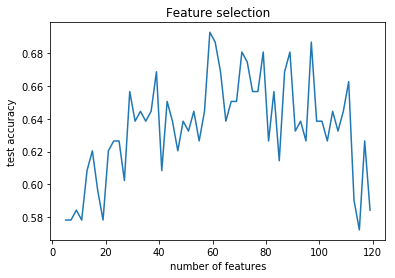

Max. test accuracy of 0.6927710843373494 at 60 features


In [226]:
plt.figure()
plt.plot(vec, testAcc)
plt.xlabel('number of features')
plt.ylabel('test accuracy')
plt.title('Feature selection')
plt.show()
maxTestAcc = max(testAcc)
optFeatures = vec[(testAcc.index(maxTestAcc))]+1

print('Max. test accuracy of {} at {} features'.format(maxTestAcc, optFeatures))


### Tune Hyperparameters

In [227]:
n_features = 60
gapSize = 0.3

In [237]:
# Define In- and Output
X = df_features[rankedFeatures[:n_features]]
print('Size of Input: {}'.format(X.shape))
Y = df_output['popularity']
print('Size of Output: {}'.format(Y.shape))

# Create quantile bins for popularity
binSize = (1-gapSize)/2
Y = pd.qcut(Y, [0, binSize, binSize+gapSize, 1], labels= False)
# Throw away the middle one
df_curr = pd.concat([X, Y], axis = 1)
n = df_curr.shape[0]
df_curr = df_curr[df_curr.popularity!=1]
print('Reduced data set to {} from {}:'.format(df_curr.shape[0], n))
df_curr.popularity = df_curr.popularity.replace(2,1)

X = df_curr.iloc[:,:-1]
print(X.shape)
X_norm = normalize(X)
Y = df_curr.popularity
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X_norm,Y, test_size=0.15, random_state=100)

Size of Input: (1592, 60)
Size of Output: (1592,)
Reduced data set to 1106 from 1592:
(1106, 60)
(1106,)


In [241]:
model = RandomForestClassifier(n_estimators=140)
model = runsModel(x_train, x_test, y_train, y_test, model)

Test Accuracy: 0.6686746987951807
Training Accuracy: 0.9968085106382979
AUC Score: 0.6671511627906976
Confusion Matrix
    0   1
0  61  25
1  30  50


In [246]:
# Tune Hyperparameter
n_estimators = np.arange(40, 300, 5)
testAcc = list()
for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i)
    model = runsModel(x_train, x_test, y_train, y_test, model, printing=False)
    testAcc.append(model.score(x_test, y_test))
    if(i%50==0):
        print('Still going...')


Still going...
Still going...
Still going...
Still going...
Still going...


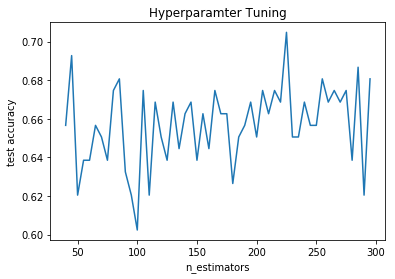

Max. test accuracy of 0.7048192771084337 at n_estimtors = 225


In [248]:
plt.figure()
plt.plot(n_estimators, testAcc)
plt.xlabel('n_estimators')
plt.ylabel('test accuracy')
plt.title('Hyperparamter Tuning')
plt.show()
maxTestAcc = max(testAcc)
optEstimators = n_estimators[(testAcc.index(maxTestAcc))]

print('Max. test accuracy of {} at n_estimtors = {}'.format(maxTestAcc, optEstimators))

## Predict regional charts

In [253]:
# Define In- and Output
X = df_features
X_norm = normalize(X)
print('Size of Input: {}'.format(X_norm.shape))
Y = df_output
Y = Y.drop('popularity', axis = 1)
print('Size of Output: {}'.format(Y.shape))

Size of Input: (1592, 120)
Size of Output: (1592, 53)


In [262]:
testAccuracy = list()
for i in range(Y.shape[1]):
    print('Performs prediction at Country: {}'.format(Y.columns[i]))
    Y_curr = Y.iloc[:,i]
    x_train, x_test, y_train, y_test = train_test_split(X_norm,Y_curr, test_size=0.15, random_state=100)
    bestModel = performsMLModelComparison(x_train, x_test, y_train, y_test, verbose = False)
    testAccuracy.append(bestModel.score(x_test, y_test))

Performs prediction at Country: ee
Random Forest is the best model
Test Accuracy: 0.7907949790794979
AUC Score: 0.6082702020202021
Confusion Matrix
     0   1
0  175   1
1   49  14
Performs prediction at Country: br
Random Forest is the best model
Test Accuracy: 0.8075313807531381
AUC Score: 0.6290322580645161
Confusion Matrix
     0   1
0  177   0
1   46  16
Performs prediction at Country: my
Random Forest is the best model
Test Accuracy: 0.7112970711297071
AUC Score: 0.6690342947338211
Confusion Matrix
     0   1
0  130   8
1   61  40
Performs prediction at Country: cz
Random Forest is the best model
Test Accuracy: 0.7154811715481172
AUC Score: 0.7127838519764509
Confusion Matrix
    0   1
0  99  24
1  44  72
Performs prediction at Country: pe
Random Forest is the best model
Test Accuracy: 0.8242677824267782
AUC Score: 0.631578947368421
Confusion Matrix
     0   1
0  182   0
1   42  15
Performs prediction at Country: gb
Random Forest is the best model
Test Accuracy: 0.686192468619246

Random Forest is the best model
Test Accuracy: 0.8410041841004184
AUC Score: 0.6273544973544973
Confusion Matrix
     0   1
0  188   1
1   37  13
Performs prediction at Country: lv
Random Forest is the best model
Test Accuracy: 0.7489539748953975
AUC Score: 0.5928783627661329
Confusion Matrix
     0   1
0  165   1
1   59  14
Performs prediction at Country: gr
Gradient Boosting is the best model
Test Accuracy: 0.7238493723849372
AUC Score: 0.6425883256528419
Confusion Matrix
     0   1
0  142  13
1   53  31
Performs prediction at Country: pa
Random Forest is the best model
Test Accuracy: 0.8326359832635983
AUC Score: 0.6610169491525424
Confusion Matrix
     0   1
0  180   0
1   40  19
Performs prediction at Country: uy
Random Forest is the best model
Test Accuracy: 0.8158995815899581
AUC Score: 0.6499534450651769
Confusion Matrix
     0   1
0  176   3
1   41  19
Performs prediction at Country: au
Gradient Boosting is the best model
Test Accuracy: 0.6610878661087866
AUC Score: 0.63486467

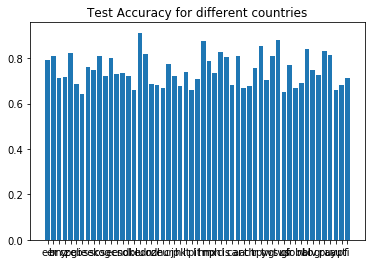

Average test accuracy: 0.6569740500463391
Best test accuracy: 0.7048192771084337
Worst test accuracy: 0.6024096385542169


In [264]:
countryNames = list(Y.columns)
plt.figure()
plt.bar(range(len(countryNames)), testAccuracy, align='center')
plt.xticks(range(len(countryNames)), countryNames)
plt.title('Test Accuracy for different countries')
plt.show()
print('Average test accuracy: {}'.format(np.mean(testAcc)))
print('Best test accuracy: {}'.format(np.max(testAcc)))
print('Worst test accuracy: {}'.format(np.min(testAcc)))